In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('dataset/european_cities_lacked.csv')

In [26]:
df.fillna?

In [14]:
df = pd.read_csv('dataset/hz_weather.csv')

In [16]:
import matplotlib.pyplot as plt

(array([ 2.,  4.,  5.,  1.,  9., 18.,  7.,  9., 12.,  5., 15.,  7.,  6.,
         2.,  1., 10.,  2.,  2.,  0.,  1.]),
 array([-3. , -1.8, -0.6,  0.6,  1.8,  3. ,  4.2,  5.4,  6.6,  7.8,  9. ,
        10.2, 11.4, 12.6, 13.8, 15. , 16.2, 17.4, 18.6, 19.8, 21. ]),
 <a list of 20 Patch objects>)

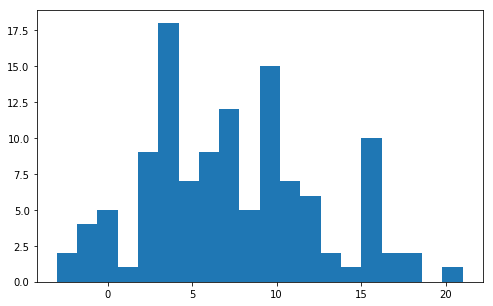

In [18]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.hist(df['最低气温'],bins=20)


In [25]:
d = df['最低气温']
zscore = (d-d.mean())/d.std()
df['isOutlier'] = zscore.abs()>3
print(df[df['isOutlier']==True])

Empty DataFrame
Columns: [日期, 最高气温, 最低气温, 天气, 风向, 风力, isOutlier]
Index: []


In [27]:
df = pd.read_csv('dataset/sale_data.csv')

In [31]:
df.groupby('位置').sum()['成交量']

位置
上海     68015
北京     27116
广东      5164
江苏    309360
河北     18152
河南      5986
浙江    161826
湖北     43274
Name: 成交量, dtype: int64

In [33]:
df.groupby('位置').mean()['价格']

位置
上海    161.200000
北京    150.000000
广东    326.000000
江苏    223.611364
河北    152.000000
河南    119.000000
浙江    290.428571
湖北    254.714286
Name: 价格, dtype: float64

In [35]:
df.groupby('位置').mean()['成交量']

位置
上海    6801.500000
北京    4519.333333
广东    5164.000000
江苏    7030.909091
河北    6050.666667
河南    5986.000000
浙江    5779.500000
湖北    6182.000000
Name: 成交量, dtype: float64

In [58]:
df = pd.read_csv('dataset/hz_weather.csv')
df.head(10)

,日期,最高气温,最低气温,天气,风向,风力
0,2017-01-01,17,7,晴,西北风,2级
1,2017-01-02,16,8,多云,东北风,2级
2,2017-01-03,15,8,多云,东北风,1级
3,2017-01-04,15,11,小雨,西北风,2级
4,2017-01-05,13,11,小到中雨,北风,2级
5,2017-01-06,12,10,小雨,东北风,1级
6,2017-01-07,11,9,中雨,北风,2级
7,2017-01-08,12,5,多云,北风,2级
8,2017-01-09,11,4,多云,东北风,2级
9,2017-01-10,9,4,多云,北风,1级


In [49]:
df.isnull().any()

日期      False
最高气温    False
最低气温    False
天气      False
风向      False
风力      False
dtype: bool

In [51]:
df.shape

(118, 6)

In [54]:
df = df.drop_duplicates('最高气温')

In [59]:
df1 = df[['最低气温','天气']]
df1.head()

,最低气温,天气
0,7,晴
1,8,多云
2,8,多云
3,11,小雨
4,11,小到中雨


In [65]:
d = df['最低气温']
df['最低异常'] = (d-d.mean())/d.std()>2

In [73]:
df['最低异常'].value_counts().to_dict()

{False: 115, True: 3}

## 练习
### 一、给定旅游路线数据集qunar_route_cnt.csv，完成以下操作：
①	读取数据，查看最后10行数据
②	查看表的数据信息
③	按“出发地”分组，统计“目的地”，目的地之间用‘；’隔开
④	删除路线页数中的异常值，将数据类型转为int型
⑤	按出发地和目的地分组查看路线页数均值
⑥	筛选出路线页数大于1000的数据并重置索引
⑦  将所有数据按行进行倒序排序
###  二、给定天气数据hz_weather.csv，完成以下操作
①	读取数据，查看前10行数据
②	检测是否有空值，若有则在原数据集上删除该数据
③	删除重复最高气温的记录
④	选取‘最低气温’和‘天气’生成新的DataFrame
⑤	利用‘均方差法’找出最低气温异常值并统计
⑥	筛选出天气为‘晴’的数据
### 三、给定旅游数据qunar_free_trip.csv，进行以下操作。
①	读取数据，查看表的数据信息，查询缺失值
②	查看数据集的维度
③	查看重复值的个数，删除重复值并检查。
④	利用‘均方差法’找出价格异常值并统计
⑤	根据出发地和目的地分组计算平均价格和平均节省
⑥  抽取前200条和后200条数据，形成新的数据集
### 四、给定销售数据sale_data.csv，完成以下操作
①	读取数据，查看第7至19的数据。
② 统计每列缺失值的数量，并将‘价格’列的平均值取代缺失值
③	删除‘宝贝’字段及其数据，查看修改后的前5行。
④	查看‘价格’字段第一个数据的类型，并将‘价格’字段均转换为整型。
⑤ 正态化‘价格’列
⑥ 按‘位置’分组，统计各地总成交量。
⑦	在第三问的基础上，按总成交量升序排序并打印。
### 五、给定数据集movie_metadata.csv，完成以下操作
①	选取‘director_name’、‘movie_title’两列展示前5行。
②	对’country’列缺失值用空值填充。
③	删除不完整的行。
④	把数据中所有的movie_title修改为大写
⑤	重命名‘title_year’列名为’release_date’;重命名‘movie_facebook_likes’列名为‘facebook_likes’
⑥	将操作后的数据集写为utf-8的CSV文件，命名为clanfile.csv。


In [112]:
'''
一、给定旅游路线数据集qunar_route_cnt.csv，完成以下操作：
① 读取数据，查看最后10行数据 ② 查看表的数据信息 
③ 按“出发地”分组，统计“目的地”，目的地之间用‘；’隔开
④ 删除路线页数中的异常值，将数据类型转为int型 
⑤ 按出发地和目的地分组查看路线页数均值
⑥ 筛选出路线页数大于1000的数据并重置索引 
⑦ 将所有数据按行进行倒序排序
'''
df = pd.read_csv('dataset/qunar_route_cnt.csv')
print(df.tail(10))
print(df.describe())

    出发地 目的地  路线页数
237  成都  武汉   517
238  成都  三亚   397
239  成都  桂林   567
240  大连  上海  1471
241  厦门  杭州  1234
242  厦门  北京  1444
243  成都  丽江  1160
244  成都  西安   876
245  武汉  厦门   352
246  武汉  杭州  1234
        出发地  目的地 路线页数
count   247  247  247
unique   15   49  109
top      南京   西安  242
freq     22   14    9


In [121]:
groupdf = df.groupby(['出发地'])['目的地'].apply(';'.join)
print(groupdf)

出发地
上海    九寨沟;西双版纳;重庆;乌鲁木齐;呼和浩特;太原;大连;哈尔滨;沈阳;张家界;神农架;长沙;...
北京    厦门;青岛;杭州;丽江;九寨沟;大理;西双版纳;昆明;西安;乌鲁木齐;银川;大连;哈尔滨;沈...
南京    厦门;青岛;苏州;丽江;成都;九寨沟;昆明;重庆;西安;西宁;呼和浩特;大连;哈尔滨;本溪;...
厦门    九寨沟;重庆;西安;乌鲁木齐;天津;呼和浩特;太原;哈尔滨;沈阳;大连;营口;神农架;长沙;...
大连      厦门;青岛;烟台;九寨沟;重庆;西安;西宁;天津;哈尔滨;张家界;长沙;武汉;湘西;三亚;上海
天津    青岛;厦门;杭州;九寨沟;大理;重庆;西安;西宁;大连;哈尔滨;长沙;武汉;三亚;桂林;广州...
宁波                     青岛;九寨沟;重庆;西安;哈尔滨;大连;武汉;长沙;神农架;桂林
广州    厦门;黄山;丽江;九寨沟;大理;拉萨;西安;西宁;呼和浩特;天津;大连;长春;沈阳;张家界;...
成都    厦门;青岛;杭州;鼓浪屿;泸沽湖;西宁;乌鲁木齐;鄂尔多斯;天津;哈尔滨;大连;沈阳;武汉;...
杭州    厦门;青岛;丽江;九寨沟;成都;西双版纳;重庆;西安;西宁;呼和浩特;天津;大连;哈尔滨;沈...
武汉                                                厦门;杭州
济南       厦门;丽江;九寨沟;昆明;西安;北京;大连;哈尔滨;沈阳;武汉;长沙;三亚;桂林;深圳;珠海
深圳    厦门;九寨沟;大理;西安;呼和浩特;天津;哈尔滨;大连;沈阳;长春;张家界;武汉;长沙;神农...
重庆     厦门;青岛;鼓浪屿;大理;西安;天津;呼和浩特;哈尔滨;大连;沈阳;长春;武汉;三亚;桂林;丽江
青岛       厦门;丽江;九寨沟;重庆;西安;承德;天津;大连;沈阳;哈尔滨;长沙;武汉;桂林;深圳;海口
Name: 目的地, dtype: object


In [114]:
df['路线页数'] = df['路线页数'].map(lambda x:int(x) if x.isnumeric() else -1)
df = df[df['路线页数']!=-1]

In [116]:
lxys = df['路线页数']
df['outerdata'] = abs((lxys-lxys.mean())/lxys.std())>3

In [119]:
groupdf = df.groupby(['出发地','目的地']).mean()
print(groupdf)

          路线页数  outerdata
出发地 目的地                  
上海  三亚     397      False
    丽江    1159      False
    乌鲁木齐   136      False
    九寨沟    168      False
    北京    1444      False
    厦门     357      False
    呼和浩特   125      False
    哈尔滨    285      False
    大连     242      False
    太原     212      False
    张家界     27      False
    桂林     576      False
    武汉     512      False
    沈阳     223      False
    神农架     29      False
    西双版纳    25      False
    西安     874      False
    重庆     898      False
    长沙     533      False
    青岛     469      False
    黄山      59      False
北京  三亚     397      False
    丽江    1160      False
    乌鲁木齐   136      False
    九寨沟    168      False
    厦门     359      False
    哈尔滨    285      False
    大理     199      False
    大连     242      False
    张家界    144      False
...        ...        ...
重庆  三亚     399      False
    丽江    1159      False
    厦门     354      False
    呼和浩特   125      False
    哈尔滨    284      False
    大理     2

In [127]:
ddf = df[df['路线页数']>1000].reset_index()
print(ddf)

    index 出发地  目的地  路线页数  outerdata
0       2  北京   杭州  1228      False
1       3  北京   丽江  1160      False
2      37  广州   丽江  1160      False
3      71  天津   杭州  1226      False
4      84  天津   广州  1231      False
5      87  天津   深圳  1112      False
6      90  杭州   丽江  1159      False
7      92  杭州   成都  1600       True
8     111  上海   丽江  1159      False
9     113  深圳   丽江  1159      False
10    114  天津   成都  1592       True
11    119  南京   丽江  1159      False
12    120  南京   成都  1592       True
13    151  济南   深圳  1154      False
14    167  上海   北京  1444      False
15    168  重庆   丽江  1159      False
16    182  青岛   深圳  1152      False
17    227  成都   杭州  1234      False
18    229  成都  泸沽湖  1159      False
19    240  大连   上海  1471      False
20    241  厦门   杭州  1234      False
21    242  厦门   北京  1444      False
22    243  成都   丽江  1160      False
23    246  武汉   杭州  1234      False


In [159]:
df = df.sort_index(ascending=False)
df

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间
30820,长春,厦门,2400,598,长春-厦门3天2晚 | 入住厦门泊旅时尚酒店会展中心店 + 山东航空往返机票,厦门泊旅时尚酒店会展中心店 舒适型 4.0分/5分,时尚标准双床房 双床 双早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30819,长春,厦门,2397,602,长春-厦门3天2晚 | 入住厦门8090城市酒店会展店 + 山东航空往返机票,厦门8090城市酒店会展店 舒适型 4.0分/5分,标准双床房[双早] 双床 双早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30818,长春,厦门,2397,614,长春-厦门3天2晚 | 入住厦门八山酒店 + 山东航空往返机票,厦门八山酒店 高档型 4.0分/5分,商务双床房(无窗) 双床 双早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30817,长春,厦门,2396,608,长春-厦门3天2晚 | 入住厦门北站华濠四季酒店 + 山东航空往返机票,厦门北站华濠四季酒店 经济型 4.4分/5分,普通大床房-手机专享 大床 双早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30816,长春,厦门,2395,610,长春-厦门3天2晚 | 入住厦门今晓酒店 + 山东航空往返机票,厦门今晓酒店 高档型 3.7分/5分,标准大床房(不含早-预... 大床 不含早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30815,长春,厦门,2393,598,长春-厦门3天2晚 | 入住厦门陆岛酒店 + 山东航空往返机票,厦门陆岛酒店 舒适型 4.1分/5分,标准双床房 双床 不含早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30814,长春,厦门,2393,602,长春-厦门3天2晚 | 入住厦门悦豪酒店 + 山东航空往返机票,厦门悦豪酒店 舒适型 4.2分/5分,精致大床房(含双早（预... 大床 双早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30813,长春,厦门,2392,602,长春-厦门3天2晚 | 入住厦门华舒酒店 + 山东航空往返机票,厦门华舒酒店 4.2分/5分,标准大床房(预付) 大床 双早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30812,长春,厦门,2391,596,长春-厦门3天2晚 | 入住厦门亿宝酒店 + 山东航空往返机票,厦门亿宝酒店 舒适型 4.0分/5分,惠选房(预付) 大/双床 双早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55
30811,长春,厦门,2388,604,长春-厦门3天2晚 | 入住厦门万寿宾馆 + 山东航空往返机票,厦门万寿宾馆 舒适型 3.9分/5分,特惠房(今日特惠)[双... 其他 双早 1间2晚,山东航空 SC4848,经停,18:30-23:30,山东航空 SC4955,经停,06:30-11:55


In [138]:
'''
二、给定天气数据hz_weather.csv，完成以下操作
① 读取数据，查看前10行数据 ② 检测是否有空值，若有则在原数据集上删除该数据
③ 删除重复最高气温的记录 ④ 选取‘最低气温’和‘天气’生成新的DataFrame 
⑤ 利用‘均方差法’找出最低气温异常值并统计 ⑥ 筛选出天气为‘晴’的数据
'''
df = pd.read_csv('dataset/hz_weather.csv')
print(df.head(3))
df.isnull().describe()

           日期  最高气温  最低气温  天气   风向  风力
0  2017-01-01    17     7   晴  西北风  2级
1  2017-01-02    16     8  多云  东北风  2级
2  2017-01-03    15     8  多云  东北风  1级


,日期,最高气温,最低气温,天气,风向,风力
count,118,118,118,118,118,118
unique,1,1,1,1,1,1
top,False,False,False,False,False,False
freq,118,118,118,118,118,118


In [163]:
'''
三、给定旅游数据qunar_free_trip.csv，进行以下操作。
① 读取数据，查看表的数据信息，查询缺失值 ② 查看数据集的维度 
③ 查看重复值的个数，删除重复值并检查。 ④ 利用‘均方差法’找出价格异常值并统计 
⑤ 根据出发地和目的地分组计算平均价格和平均节省 ⑥ 抽取前200条和后200条数据，形成新的数据集
'''
df = pd.read_csv('dataset/qunar_free_trip.csv')
df.head()

,出发地,目的地,价格,节省,路线名,酒店,房间,去程航司,去程方式,去程时间,回程航司,回程方式,回程时间
0,北京,厦门,1866,492,北京-厦门3天2晚 | 入住厦门温特雅酒店 + 联合航空/首都航空往返机票,厦门温特雅酒店 舒适型 3.9分/5分,标准房(大床)(预付) 大床 不含早 1间2晚,联合航空 KN5927,直飞,16:55-19:45,首都航空 JD5376,直飞,22:15-01:15
1,北京,厦门,2030,492,北京-厦门3天2晚 | 入住厦门华美达长升大酒店 + 联合航空/首都航空往返机票,厦门华美达长升大酒店 4.1分/5分,标准房(错峰出游) 大/双床 双早 1间2晚,联合航空 KN5927,直飞,16:55-19:45,首都航空 JD5376,直飞,22:15-01:15
2,北京,厦门,2139,533,北京-厦门3天2晚 | 入住厦门毕思特酒店 + 联合航空/首都航空往返机票,厦门毕思特酒店 高档型 4.4分/5分,标准大床房(特惠)[双... 大床 双早 1间2晚,联合航空 KN5927,直飞,16:55-19:45,首都航空 JD5376,直飞,22:15-01:15
3,北京,厦门,2141,502,北京-厦门3天2晚 | 入住厦门翔鹭国际大酒店 + 联合航空/首都航空往返机票,厦门翔鹭国际大酒店 豪华型 4.4分/5分,高级大床房(含单早) 其他 单早 1间2晚,联合航空 KN5927,直飞,16:55-19:45,首都航空 JD5376,直飞,22:15-01:15
4,北京,厦门,2159,524,北京-厦门3天2晚 | 入住厦门京闽中心酒店 + 联合航空/首都航空往返机票,厦门京闽中心酒店 4.5分/5分,高级房(双床)(新春特... 双床 双早 1间2晚,联合航空 KN5927,直飞,16:55-19:45,首都航空 JD5376,直飞,22:15-01:15


In [164]:
df.groupby(['出发地','目的地']).mean()[['价格','节省']]

价格          节省
出发地 目的地                          
上海  三亚    1627.350000  444.390000
    丽江    1981.490000  569.380000
    乌鲁木齐  3223.760000  711.800000
    九寨沟   1893.712500  492.425000
    北京    1317.090000  344.650000
    厦门    1322.670000  339.510000
    呼和浩特  1561.230000  432.320000
    哈尔滨   1352.990000  357.960000
    大连    1258.300000  351.340000
    太原    1412.790000  433.600000
    张家界   2203.230000  539.200000
    桂林    1325.830000  351.800000
    武汉    1136.220000  335.930000
    沈阳    1455.610000  387.260000
    神农架   1264.580000  352.280000
    西双版纳  3693.310000  903.720000
    西安    1381.830000  408.000000
    重庆    1641.170000  471.760000
    长沙    1147.920000  349.570000
    青岛     886.320000  358.050000
    黄山    1290.330000  402.110000
北京  三亚    2760.400000  636.210000
    丽江    1958.160000  509.280000
    乌鲁木齐  2362.060000  624.260000
    九寨沟   1953.740000  533.140000
    厦门    1902.380000  505.570000
    哈尔滨   1437.990000  364.220000
    大理    3475.980000  965.420000
    大连    1218.300000  323.320000
    张家界   2249.930000  539.640000
...               ...         ...
重庆  哈尔滨   2079.270000  545.820000
    大理    1633.570000  475.260000
    大连    2121.070000  528.740000
    天津    1297.400000  346.790000
    桂林     984.650000  352.040000
    武汉    1068.950000  337.690000
    沈阳    1931.720000  513.480000
    西安    1040.830000  348.280000
    长春    1940.630000  487.850000
    青岛    1663.790000  435.730000
    鼓浪屿   1764.670000  483.610000
长春  厦门    2425.807018  615.438596
    青岛    1387.320000  390.080000
青岛  丽江    2448.570000  567.360000
    九寨沟   1866.200000  451.480000
    北京    1190.900000  335.300000
    厦门    2320.330000  561.510000
    哈尔滨   1205.555556  373.888889
    大连     937.070000  328.740000
    天津     910.400000  330.910000
    承德    1191.010000  339.350000
    杭州     971.912500  324.987500
    桂林    1519.650000  423.880000
    武汉    1389.820000  345.730000
    沈阳    1001.720000  323.020000
    海口    1718.790000  459.580000
    深圳    1738.480000  491.990000
    西安    1185.940000  345.640000
    重庆    1547.290000  427.220000
    长沙    1804.010000  457.510000

[313 rows x 2 columns]

In [168]:
df1 = df[:200]
df1 = df1.append(df[-200:])

In [169]:
df1.shape


(400, 13)

In [206]:
'''
四、给定销售数据sale_data.csv，完成以下操作
① 读取数据，查看第7至19的数据。 ② 统计每列缺失值的数量，并将‘价格’列的平均值取代缺失值 
③ 删除‘宝贝’字段及其数据，查看修改后的前5行。 ④ 查看‘价格’字段第一个数据的类型，并将‘价格’字段均转换为整型。 
⑤ 正态化‘价格’列 ⑥ 按‘位置’分组，统计各地总成交量。 ⑦ 在第三问的基础上，按总成交量升序排序并打印。
'''
df = pd.read_csv('dataset/sale_data.csv')
df[7:20]

,ID,宝贝,价格,成交量,卖家,位置
7,8,中老年女装夏季T恤雪纺衫妈妈装夏装套装短袖中年妇女40-50岁t恤,288.0,12087,zxtvszml,江苏
8,9,妈妈夏装两件套母亲节衣服老人上衣60-70岁人夏季中老年女装套装,298.0,11655,ceo放牛,江苏
9,10,中老年女装夏装套装圆领上衣裤子夏季中年妈妈装短袖T恤两件套,189.0,11632,简港旗舰店,上海
10,11,母亲节衣服夏季中年女装春装套装40-50岁妈妈装外套中老年人上衣,258.0,11568,朵莹旗舰店,浙江
11,12,母亲节衣服中老年人女装奶奶短袖两件套中年40岁胖妈妈装夏装套装,177.0,11125,依诗曼妮,江苏
12,13,母亲节中老年女装短袖t恤40-50岁中年妈妈装夏装套装上衣两件套,298.0,10366,夕牧旗舰店,江苏
13,14,母亲节中老年女装短袖t恤40-50岁中年妈妈装夏装雪纺两件套装,124.0,9113,绰美佳人旗舰店,江苏
14,15,中老年女装春装真两件套长袖针织开衫外套妈妈装夏装短袖T恤上衣,138.0,9060,冉献兵,浙江
15,16,母亲节衣服夏季中年女装夏装短袖40-50岁妈妈装中老年女装连衣裙,298.0,8843,蒲洛妃旗舰店,江苏
16,17,母亲节妈妈夏装套装中老年雪纺衫中年女春装阔腿裤两件套40岁衣服,318.0,8580,薇诗琪旗舰店,湖北


In [207]:
df.drop('宝贝',axis=1)

,ID,价格,成交量,卖家,位置
0,1,99.0,16647,夏奈凤凰旗舰店,江苏
1,2,286.0,14045,夏洛特的文艺,上海
2,3,298.0,13458,云新旗舰店,江苏
3,4,279.0,13340,韶妃旗舰店,浙江
4,5,59.0,12939,千百奈旗舰店,江苏
5,6,198.0,12664,依安雅旗舰店,江苏
6,7,199.0,12398,千百萌旗舰店,湖北
7,8,288.0,12087,zxtvszml,江苏
8,9,298.0,11655,ceo放牛,江苏
9,10,189.0,11632,简港旗舰店,上海


In [208]:
type(df['价格'][0])

numpy.float64

In [209]:
df["价格"] = df['价格'].map(lambda x:int(x))

In [210]:
jg = df['价格']
df['价格'] = (df['价格']-df['价格'].mean())/df['价格'].std()

In [184]:
df.groupby('位置').count()['成交量']

位置
上海    10
北京     6
广东     1
江苏    44
河北     3
河南     1
浙江    28
湖北     7
Name: 成交量, dtype: int64

In [185]:
df.sort_values(by='成交量')

,ID,宝贝,价格,成交量,卖家,位置
99,100,中老年女装春装t恤纱袖针织衫40-50岁妈妈装七分袖上衣夏装打底衫,3.483963,3956,潮流前线9170,浙江
98,99,母亲节衣服夏季中老年女装夏装短袖套装雪纺衫T恤妈妈装两件套,2.033393,3968,蕴涵旗舰店,江苏
97,98,母亲节妈妈装夏装套装女40-50岁夏季衣服两件套中老年春装连衣裙,-0.279884,4000,若澜锦蒂旗舰店,浙江
96,97,母亲节衣服中年妈妈装夏装短袖套装30中老年女装春装雪纺衫40岁50,-0.386768,4023,浅恋旗舰店,浙江
95,96,母亲节中老年女装运动服套装中年妈妈春装外套40岁50衣服2017新款,1.040898,4041,欧芮嘉旗舰店,湖北
94,95,妈妈装春装外套 中年人40-50岁上衣中老年女装2017夏装新款两件套,1.269936,4054,qianyaofushi888,浙江
93,94,中老年女夏装上衣短袖雪纺衬衫40-50岁大码胖妈妈装T恤母亲节衣服,-0.409671,4111,凯利娜格旗舰店,湖北
92,93,母亲节衣服夏季中年女装连衣裙中长款裙子中老年妈妈装夏装40岁50,0.330883,4129,浅恋旗舰店,浙江
91,92,母亲节衣服妈妈夏装雪纺连衣裙40岁50中年短袖中老年女装夏季裙子,0.567555,4138,sonmellny尚曼妮旗舰店,湖北
90,91,中年妈妈装夏装短袖t恤两件套装中老年女装中袖雪纺衫40-50岁上衣,-0.883015,4153,金星靓雅服装店,江苏


In [186]:
'''
五、给定数据集movie_metadata.csv，完成以下操作
① 选取‘director_name’、‘movie_title’两列展示前5行。 ② 对’country’列缺失值用空值填充。
③ 删除不完整的行。 ④ 把数据中所有的movie_title修改为大写 
⑤ 重命名‘title_year’列名为’release_date’;重命名‘movie_facebook_likes’列名为‘facebook_likes’ 
⑥ 将操作后的数据集写为utf-8的CSV文件，命名为clanfile.csv。
'''
df = pd.read_csv('dataset/movie_metadata.csv')
df[['director_name','movie_title']][:6]

,director_name,movie_title
0,James Cameron,Avatar
1,Gore Verbinski,Pirates of the Caribbean: At World's End
2,Sam Mendes,Spectre
3,Christopher Nolan,The Dark Knight Rises
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,John Carter


In [190]:
df['country'] = df['country'].fillna('')

In [194]:
df['movie_title'] = df['movie_title'].map(lambda x:x.upper())

In [198]:
df['release_date'] = df['title_year'].rename('release_date')

In [203]:
df = df.rename({'title_year':'release_date','movie_facebook_likes':'facebook_likes'})

In [204]:
df.to_csv('clanfile.csv',encoding='utf-8')

In [214]:
round(2.3456,2)

2.35